# Big Five traits Dataset 
## Source: https://github.com/estiei/Big-Five-Backstage

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the options to display all columns and rows without truncation
pd.set_option('display.max_columns', None)  # None means unlimited
pd.set_option('display.max_rows', None)  # Be cautious with this if you have a large DataFrame
pd.set_option('display.width', 250)  # Adjust display width to the maximum possible




In [2]:
df = pd.read_csv('Big-Five_Backstage.csv')
traits = ['Extraversion', 'Agreeableness', 'Openness', 'Neuroticism', 'Conscientiousness']

# drop those rows that 5 traits are all 0
df['sum'] = df[traits].sum(axis=1)

# drop rows where sum == 0.0
df = df[df['sum'] != 0.0]
df = df.drop(columns=['sum'])

df['gender'] = df['gender'].replace('M', 1)
df['gender'] = df['gender'].replace('F', 0)
print(df.shape)
print(df[['gender', 'Extraversion', 'Agreeableness', 'Openness', 'Neuroticism', 'Conscientiousness']].head(5))

(3144, 12)
   gender  Extraversion  Agreeableness  Openness  Neuroticism  Conscientiousness
1       1           0.0            0.0       0.0          1.0                0.0
2       0           0.0            1.0       0.0          1.0                1.0
3       1           0.0            0.0       0.0          1.0                1.0
4       0           0.0            1.0       0.0          1.0                1.0
5       1           0.0            1.0       1.0          1.0                1.0


## Balance male vs female

In [3]:
# balance the data by gender

# Separate the dataset into two based on gender
df_male = df[df['gender'] == 1]
df_female = df[df['gender'] == 0]

# Randomly sample from the majority class to match the size of the minority class
if len(df_male) > len(df_female):
    df_male = df_male.sample(len(df_female))
else:
    df_female = df_female.sample(len(df_male))

# Concatenate the two balanced datasets
df = pd.concat([df_male, df_female])



In [4]:
print(df.columns)

Index(['Unnamed: 0', 'author', 'play', 'character', 'text', 'num_lines', 'gender', 'Extraversion', 'Agreeableness', 'Openness', 'Neuroticism', 'Conscientiousness'], dtype='object')


## Histogram of text length

<Axes: >

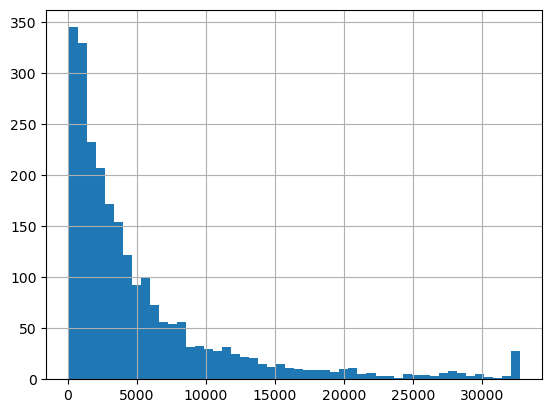

In [5]:
df['text'].map(lambda x: len(x)).hist(bins=50)

## One Text instance

In [6]:
firstText = df['text'][1000]
print(len(firstText.split('.')))
for s  in firstText.split('.'):
	print(s)
	print('')

77
I begin to think so myself

 At that dinner at the Brown’s he came pretty near making a show of himself

 Leave that to me

 I am decided on one thing and that is I shall never marry a tippler

 There may be enough trouble in the family already

 No, thank heaven, but you don’t have to go so far as that

 I mean your husband, Mr

 Bob Slightly

 Before long he may not be able to say that

 Sister, you don’t hear what people say, as I do

 Well, they say that since Mr

 Bob Slightly’s old chum, Dick Plyer, has returned from the west, that both are taking a great deal more liquor than is good for them

 I know it doesn’t

 How does brother John get along in the same business, without constant treating? But he forgets that he has a liking for it, and that his appetite will grow

 Encourage him! I never encouraged him

 I wanted to be sure of his character, and now that I know his weakness I shall decline his company

 Take the wine off your own table

 If put to the test which would he

## Male vs Female After balance

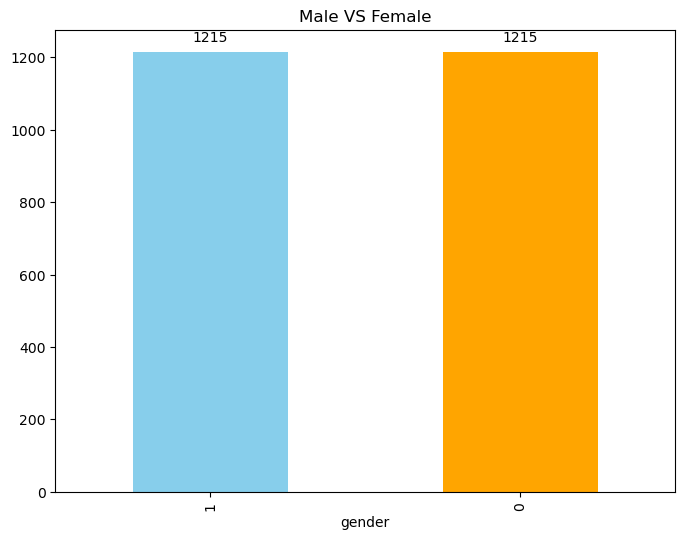

In [7]:
fig = plt.figure(figsize=(8,6))

# Plotting the bar chart
ax = df['gender'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])

plt.title('Male VS Female')

# Loop through each bar in the plot and add a text label
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.show()

## 5 Traits wrt Gender => data is a bit fictious

        Extraversion  Agreeableness  Openness  Neuroticism  Conscientiousness
gender                                                                       
0           0.341564       0.641152  0.294650     0.442798           0.380247
1           0.337449       0.642798  0.295473     0.446091           0.419753


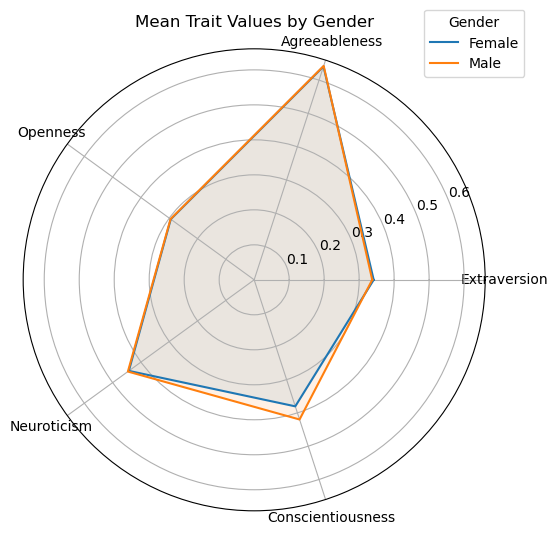

In [8]:
#Calculate the mean of each trait by gender 
traits = ['Extraversion', 'Agreeableness', 'Openness', 'Neuroticism', 'Conscientiousness']
mean_traits = df[traits + ['gender']].groupby('gender').mean()

print(mean_traits)
# Set up the radar chart
labels = mean_traits.columns.values
num_vars = len(labels)

# Compute angle each bar is centered on:
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist() # Close the loop
angles += angles[:1]  # Ensure the graph is circular by appending the start value to the end

# Radar chart setup
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))


for i, row in mean_traits.iterrows():
    data = row.tolist()
    data += data[:1]  # Ensure the graph is circular by appending the start value to the end
    gen = "Male" if i == 1 else 'Female'
    ax.plot(angles, data, label=gen)
    ax.fill(angles, data, alpha=0.1)

# Add labels to each point in the radar chart
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

# Add legend and title
ax.legend(title="Gender", loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.title('Mean Trait Values by Gender')

plt.show()

## 5 Traits distribution

array([[<Axes: title={'center': 'Extraversion'}>,
        <Axes: title={'center': 'Agreeableness'}>],
       [<Axes: title={'center': 'Openness'}>,
        <Axes: title={'center': 'Neuroticism'}>],
       [<Axes: title={'center': 'Conscientiousness'}>, <Axes: >]],
      dtype=object)

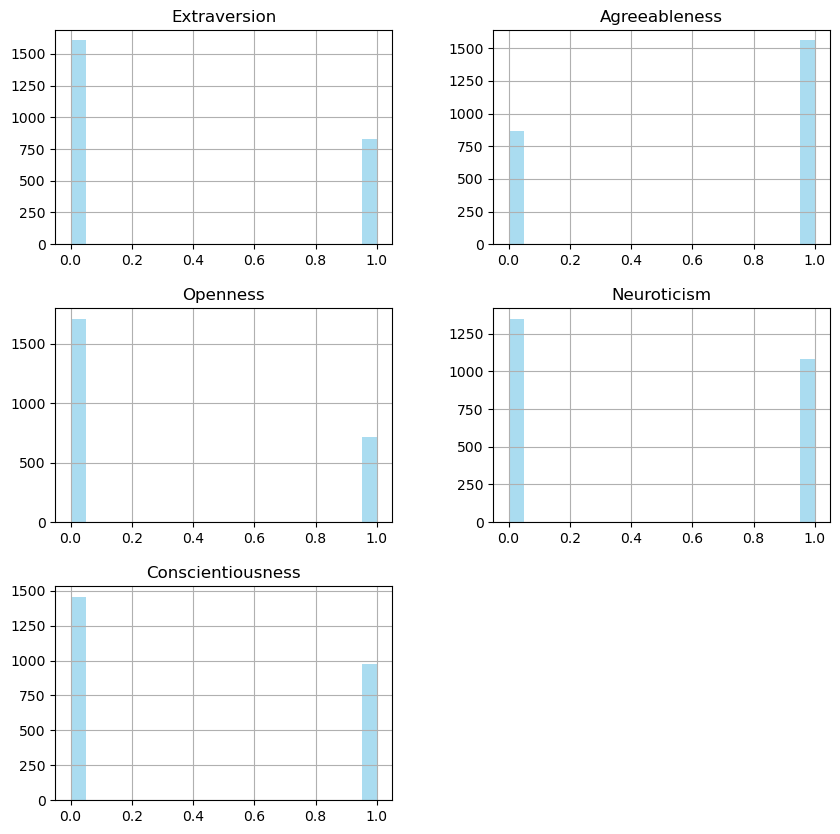

In [9]:

df[traits].hist(bins=20, figsize=(10, 10), color='skyblue', alpha=0.7)

## Text wrt Gender

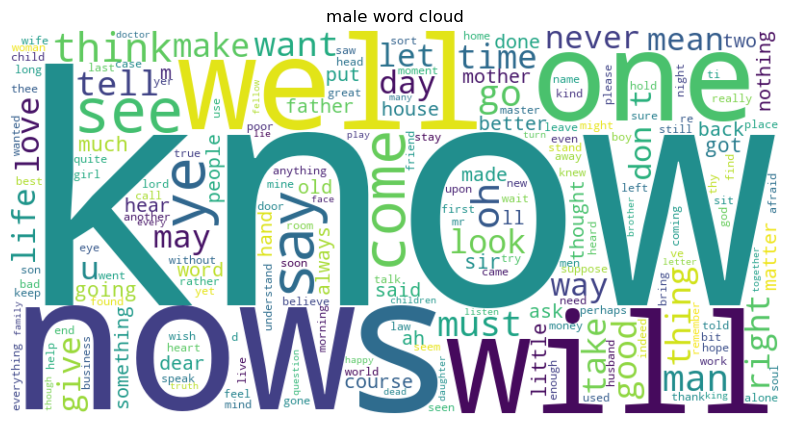

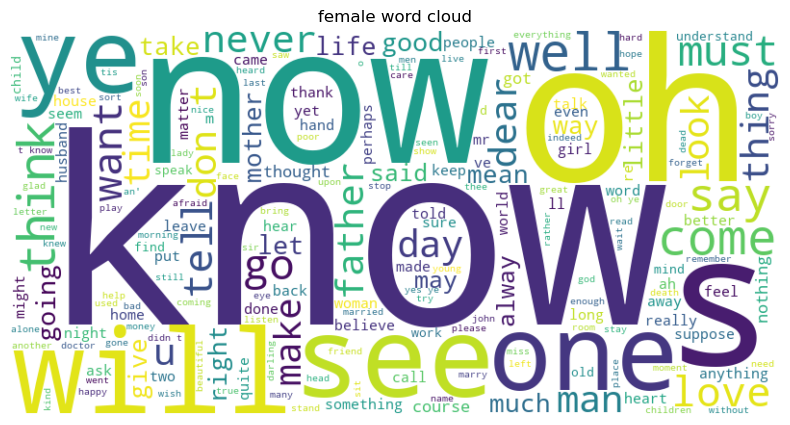

In [10]:
df_male = df[df['gender'] == 1]
df_female = df[df['gender'] == 0]

maleText = df_male['text'].to_list()
femaleText = df_female['text'].to_list()

maleText = ' '.join(maleText).lower()
femaleText = ' '.join(femaleText).lower()


from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(maleText)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('male word cloud')
plt.show()


# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(femaleText)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('female word cloud')
plt.show()

## Text Analysis

### 1. Tokenize text

In [23]:
import nltk
from nltk import word_tokenize

def tokenizeText(text):
	stop_words = set(nltk.corpus.stopwords.words('english'))

	# add ['yes', 'ha', 'dear', 'oh', 'u']
	stop_words.add('yes')
	stop_words.add('ha')
	stop_words.add('dear')
	stop_words.add('oh')
	stop_words.add('u')

	tokens = word_tokenize(text)
	tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
	return tokens

male_tokens = tokenizeText(maleText)
female_tokens = tokenizeText(femaleText)


print(f'number of Vocabulary in male: {len(set(male_tokens))}')
print(f'number of Vocabulary if female: {len(set(female_tokens))}')

number of Vocabulary in male: 29819
number of Vocabulary if female: 24322


### 2. Stemming and Lemmantizing

In [24]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize_text(tokens):
	# Tokenize the text and find the POS tag for each token
	lemmatizer = WordNetLemmatizer()
	tagged_tokens = nltk.pos_tag(tokens)

	lem_tokens = []
     
	# Lemmatize each token
	for token, tag in tagged_tokens:
		wordnet_tag = get_wordnet_pos(tag)
		if wordnet_tag is None:
			lem_tokens.append(lemmatizer.lemmatize(token))
		else:
			lem_tokens.append(lemmatizer.lemmatize(token, pos=wordnet_tag))
                  
		
	return lem_tokens

male_tokens = lemmatize_text(male_tokens)


female_tokens = lemmatize_text(female_tokens)

### 3. Distribution of word

In [25]:

def analyseDist(tokens):
	text = nltk.Text(tokens)
	fdist = nltk.FreqDist(text)
	# Print the number of unique words
	print(f'Vocab num: {len(fdist)}')

	# Print the 10 most common words
	print(fdist.most_common(10))

	# Plot the frequency distribution
	fdist.plot(20, cumulative=False)


Analyse male text
Vocab num: 24418
[('go', 6838), ('know', 6254), ('say', 5796), ('well', 5742), ('come', 5705), ('one', 5002), ('see', 4928), ('think', 4574), ('get', 4412), ('good', 4041)]


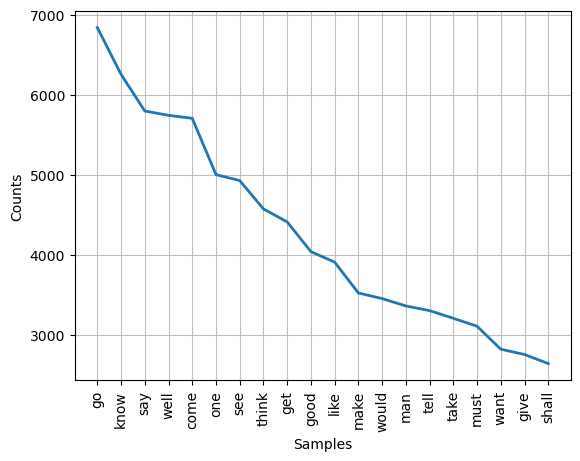

Analyse female text
Vocab num: 20007
[('go', 7564), ('know', 6646), ('come', 5986), ('say', 5442), ('think', 5295), ('well', 4986), ('see', 4955), ('one', 4608), ('like', 3920), ('get', 3841)]


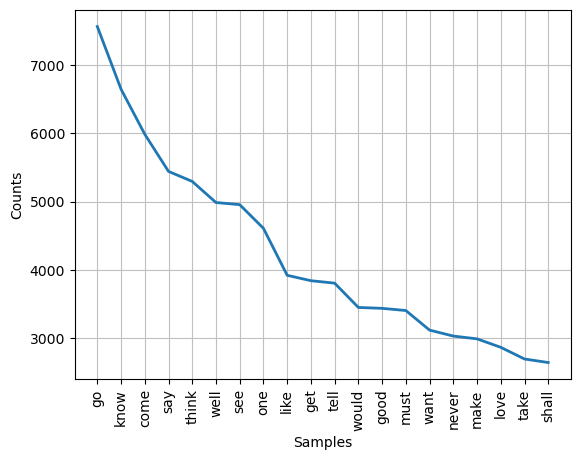

In [26]:
print(f'Analyse male text')
analyseDist(male_tokens)

print(f'Analyse female text')
analyseDist(female_tokens)

### 4. N gram analysis

In [27]:
def analyseNGram(tokens, n=2):
	bigrams = list(nltk.ngrams(tokens, n))
	fdist = nltk.FreqDist(bigrams)
	print(f'Vocab num: {len(fdist)}')
	print(fdist.most_common(10))

	print(fdist.plot(20, cumulative=False))

In [157]:
def analyseOverlap(tokens_1, name_1, tokens_2, name_2, n=2):
	'''
	Analyse the overlap between two list of tokens
	presumably from 1 for male, 2 for female
	'''
	# Create a frequency distribution of bigrams for male
	ngrams = list(nltk.ngrams(tokens_1, n))
	fdist_1 = nltk.FreqDist(ngrams)

	# Create a frequency distribution of bigrams for femlae
	ngrams = list(nltk.ngrams(tokens_2, n))
	fdist_2 = nltk.FreqDist(ngrams)

	# Find the number of unique bigrams
	print(f'Number of unique {n}-grams for {name_1}: {len(fdist_1)}')
	print(f'Number of unique {n}-grams for {name_2}: {len(fdist_2)}')

	# get intersection, differences
	set_1 = set(fdist_1)
	set_2 = set(fdist_2)

	intersection = set_1.intersection(set_2)
	difference_1 = set_1.difference(set_2)
	difference_2 = set_2.difference(set_1)

	print(f'Number of intersect: {len(intersection)}')
	print(f'Number of difference for {name_1}: {len(difference_1)}')
	print(f'Number of difference for {name_2}: {len(difference_2)}')
	
	# Calculate the total number of occurrences of ngrams
	totalOccur = sum([fdist_1[word] for word in fdist_1]) + sum([fdist_2[word] for word in fdist_2])

	# Calculate the total number of occurrences of ngrams in the intersection
	interOccur = 0
	for word in intersection:
		interOccur += fdist_1[word] if word in fdist_1 else 0
		interOccur += fdist_2[word] if word in fdist_2 else 0

	# Calculate the percentage of overlap
	print(f'Percentage of overlap: {interOccur/totalOccur * 100}%')

	# Calculate the total number of occurrences of ngrams in the difference
	difOccur_1 = 0
	for word in difference_1:
		difOccur_1 += fdist_1[word] if word in fdist_1 else 0

	difOccur_2 = 0
	for word in difference_2:
		difOccur_2 += fdist_2[word] if word in fdist_2 else 0

	# Calculate the percentage of difference
	print(f'Percentage of difference for {name_1}: {difOccur_1/totalOccur * 100}%')
	print(f'Percentage of difference for {name_2}: {difOccur_2/totalOccur * 100}%')

for i in range(1, 5):
	print(f'Analyse {i}-grams for {i}')
	analyseOverlap(male_tokens, 'male', female_tokens,'female', i)

	print('*'*50)

Analyse 1-grams for 1
Number of unique 1-grams for male: 24418
Number of unique 1-grams for female: 20007
Number of intersect: 14160
Number of difference for male: 10258
Number of difference for female: 5847
Percentage of overlap: 97.24050235894065%
Percentage of difference for male: 1.7768103948320588%
Percentage of difference for female: 0.982687246227301%
**************************************************
Analyse 2-grams for 2
Number of unique 2-grams for male: 367977
Number of unique 2-grams for female: 309750
Number of intersect: 74390
Number of difference for male: 293587
Number of difference for female: 235360
Percentage of overlap: 43.67808382237909%
Percentage of difference for male: 31.178603413810173%
Percentage of difference for female: 25.143312763810737%
**************************************************
Analyse 3-grams for 3
Number of unique 3-grams for male: 545737
Number of unique 3-grams for female: 481181
Number of intersect: 13954
Number of difference for male: 5317

Vocab num: 545737
[(('let', 'u', 'go'), 33), (('one', 'two', 'three'), 29), (('say', 'good', 'bye'), 27), (('beg', 'pardon', 'sir'), 24), (('let', 'u', 'talk'), 22), (('good', 'bye', 'good'), 18), (('five', 'year', 'ago'), 18), (('mr', 'de', 'levi'), 17), (('well', 'good', 'bye'), 15), (('well', 'let', 'u'), 15)]


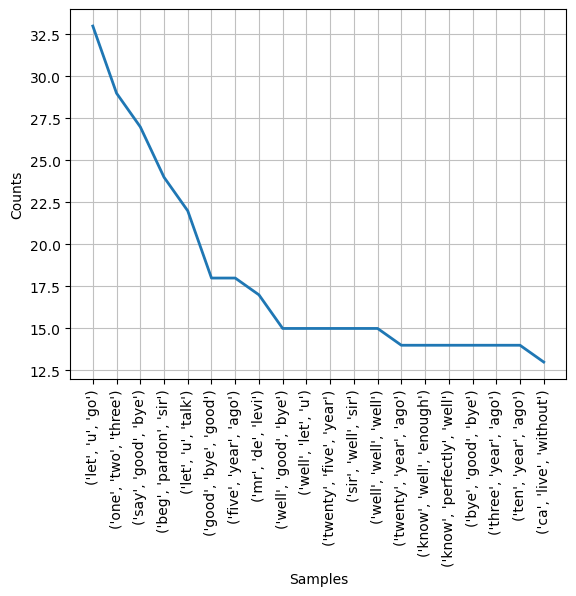

Axes(0.125,0.11;0.775x0.77)
Vocab num: 481181
[(('say', 'good', 'bye'), 46), (('let', 'u', 'go'), 41), (('herr', 'von', 'wolters'), 27), (('let', 'u', 'talk'), 26), (('go', 'away', 'go'), 23), (('well', 'well', 'well'), 23), (('two', 'year', 'ago'), 23), (('know', 'well', 'enough'), 21), (('go', 'let', 'go'), 21), (('would', 'like', 'see'), 19)]


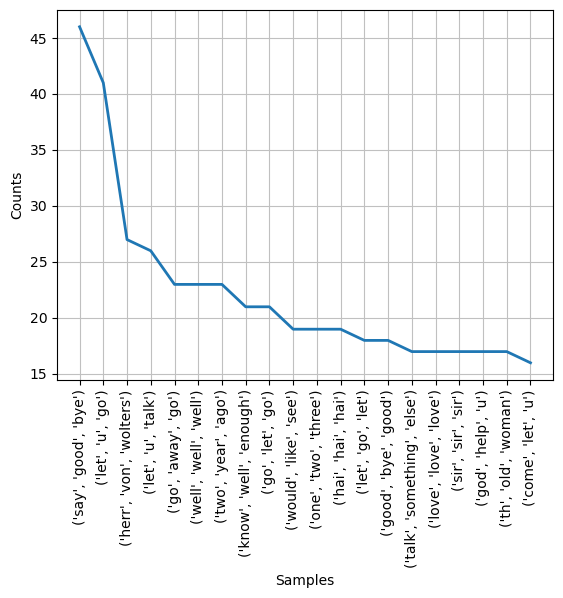

Axes(0.125,0.11;0.775x0.77)


In [159]:
analyseNGram(male_tokens,3)

analyseNGram(female_tokens,3)

## Model

### 1. preprocessing text

#### a. clean the text from df

In [40]:
def preprocessing(text):
	# Tokenize the text
	tokens = tokenizeText(text)
	# Lemmatize the tokens
	tokens = lemmatize_text(tokens)
	return ' '.join(tokens)

df['clean_text'] = df['text'].map(preprocessing)

(273, 13)
(595, 13)
total 2430


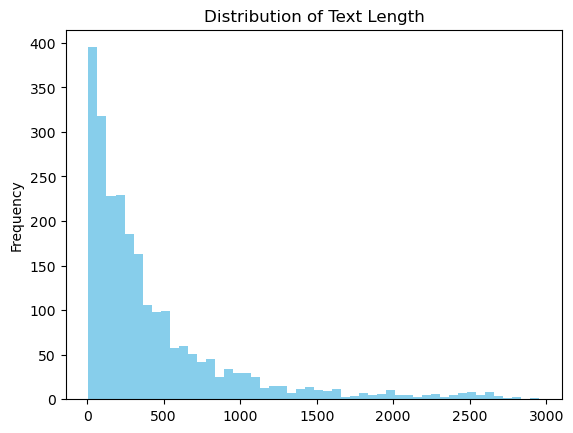

In [63]:
length = df['clean_text'].map(lambda x: len(x.split()))
length.plot(kind='hist', bins=50, title='Distribution of Text Length', color='skyblue')

# will try to pad and truncate the text to 1000 first to see the result, will consider edit the length later

#### b. Tokenize, pad, truncate and word2vec

In [71]:
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Split the text into tokens
#tokens = df['clean_text'].map(lambda x: x.split())

text = df['clean_text'].to_list()
# Create a tokenizer
tokenizer = Tokenizer()
# Fit the tokenizer on the tokens
tokenizer.fit_on_texts(text)

# Convert the tokens to sequences
tokens = tokenizer.texts_to_sequences(text)



dislike play time seldom possible natural preference horse ever favour companion man even record roman emperor caligula custom date remote antiquity pictorial representation stand charioteer find assyrian friezes egyptian tomb certainly hemp rope make doubtless derive flax grown province ulster ireland especially county antrim principal town belfast lisbon carrickfergus quite savage instinct remarkable agility south sea islander certainly somewhat unfeminine instinct although justified one example history thus boadicea blade probably come district cleveland yorkshire iron steel industry may see great development doubtless heard steel work eston blast furnace middlesborough allow describe ingenious construction doubtless herbarium ignorant girl herbarium flower collection dry flower plant mistake carefully dry plant stick book minute description specimen write opposite page fish glue certain purpose valuable substance even know cure cecity blindness thus tobit never density cork varies 

#### - Use fasttext to get the word embedding

In [142]:
from gensim.models.keyedvectors import KeyedVectors

# Path to your ".vec" file
vec_file = 'wiki-news-300d-1M-subword.vec'
# down load from https://fasttext.cc/docs/en/english-vectors.html 
# Load the vectors
fast_model = KeyedVectors.load_word2vec_format(vec_file, binary=False)


### - Get train and test data

In [151]:
# Set the maximum length of the tokens
max_length = 512
# Pad and truncate the tokens
#tokens = tokens.map(lambda x: x[:max_length] if len(x) > max_length else x + [''] * (max_length - len(x)))
paddded_tokens = pad_sequences(tokens, maxlen=max_length, padding='post', truncating='post')
X = paddded_tokens
Y = df[traits].to_numpy()


#### - Create a dictionary of word embeddings

In [152]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 300

# Create an embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))

# Loop through each word in the tokenizer
for word, i in tokenizer.word_index.items():
	# Check if the word is in the model
	if word in fast_model:
		# Add the vector to the matrix
		embedding_matrix[i] = fast_model[word]
		

In [153]:
''' for word2vec

def vectorize_sentence(sentence, model):
	# create sentence using mean of word vectors(instead of sum) 

	vector = np.zeros(model.vector_size)

	# Sum the word vectors for each word in the sentence
	for i, word in enumerate(sentence):
		if word in model.wv:
			vector += model.wv[word]
	
	# Return the average
	return vector / (i + 1)


# Vectorize the sentences
X = np.array([vectorize_sentence(sentence, w2vmodel) for sentence in tokens])
Y = df[traits].to_numpy()
vocab_size = len(w2vmodel.wv.key_to_index)
embedding_dim = w2vmodel.vector_size'''




' for word2vec\n\ndef vectorize_sentence(sentence, model):\n\t# create sentence using mean of word vectors(instead of sum) \n\n\tvector = np.zeros(model.vector_size)\n\n\t# Sum the word vectors for each word in the sentence\n\tfor i, word in enumerate(sentence):\n\t\tif word in model.wv:\n\t\t\tvector += model.wv[word]\n\t\n\t# Return the average\n\treturn vector / (i + 1)\n\n\n# Vectorize the sentences\nX = np.array([vectorize_sentence(sentence, w2vmodel) for sentence in tokens])\nY = df[traits].to_numpy()\nvocab_size = len(w2vmodel.wv.key_to_index)\nembedding_dim = w2vmodel.vector_size'

#### c. Build model

In [154]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

model = Sequential([
	Embedding(vocab_size, embedding_dim, input_length=max_length, weights=[embedding_matrix], trainable=False),
	LSTM(128, return_sequences=True),
	LSTM(32),
	Dense(5, activation='sigmoid')
])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 512, 300)          9080100   
                                                                 
 lstm_19 (LSTM)              (None, 512, 128)          219648    
                                                                 
 lstm_20 (LSTM)              (None, 32)                20608     
                                                                 
 dense_39 (Dense)            (None, 5)                 165       
                                                                 
Total params: 9320521 (35.55 MB)
Trainable params: 240421 (939.14 KB)
Non-trainable params: 9080100 (34.64 MB)
_________________________________________________________________


#### d. Compile the model and fit it to the data

In [155]:
from sklearn.model_selection import train_test_split

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))


Epoch 1/10
61/61 [==============================] - 30s 475ms/step - loss: 0.6600 - accuracy: 0.4095 - val_loss: 0.6566 - val_accuracy: 0.3909
Epoch 2/10
61/61 [==============================] - 31s 506ms/step - loss: 0.6524 - accuracy: 0.4126 - val_loss: 0.6551 - val_accuracy: 0.3909
Epoch 3/10
61/61 [==============================] - 30s 493ms/step - loss: 0.6516 - accuracy: 0.4126 - val_loss: 0.6547 - val_accuracy: 0.3909
Epoch 4/10
61/61 [==============================] - 31s 512ms/step - loss: 0.6512 - accuracy: 0.4126 - val_loss: 0.6555 - val_accuracy: 0.3889
Epoch 5/10
61/61 [==============================] - 31s 517ms/step - loss: 0.6512 - accuracy: 0.4136 - val_loss: 0.6551 - val_accuracy: 0.3889
Epoch 6/10
61/61 [==============================] - 31s 501ms/step - loss: 0.6500 - accuracy: 0.4126 - val_loss: 0.6542 - val_accuracy: 0.3909
Epoch 7/10
61/61 [==============================] - 31s 505ms/step - loss: 0.6489 - accuracy: 0.4126 - val_loss: 0.6541 - val_accuracy: 0.3889

In [94]:
model.save('big5_model.h5')

/Users/vickieduong/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


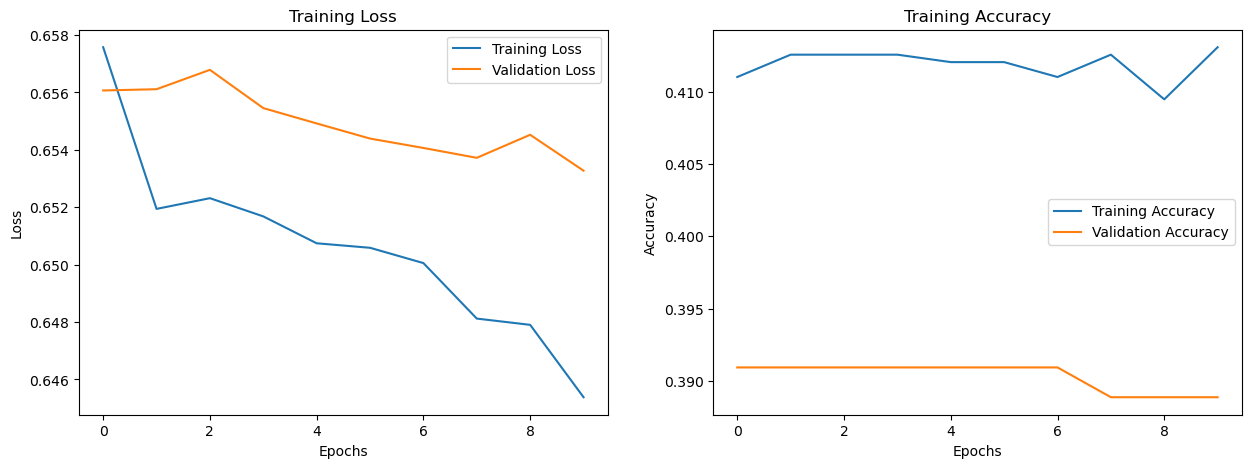

In [95]:

# Plot the training history
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the training loss
ax[0].plot(history.history['loss'], label='Training Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Training Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Plot the training accuracy
ax[1].plot(history.history['accuracy'], label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_title('Training Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()

# Data is quite hard to differentiate between female and male
## judging by the distribution of words like 1,2,3-gram


## same level of accuracy using fasttext(as embedding) + lstm, and word2vec + Dense. ~41% accuracy

## Build ML models to predict each traits

#### - Check the distribution of the predicted values

array([[<Axes: title={'center': 'Extraversion'}>,
        <Axes: title={'center': 'Agreeableness'}>],
       [<Axes: title={'center': 'Openness'}>,
        <Axes: title={'center': 'Neuroticism'}>],
       [<Axes: title={'center': 'Conscientiousness'}>, <Axes: >]],
      dtype=object)

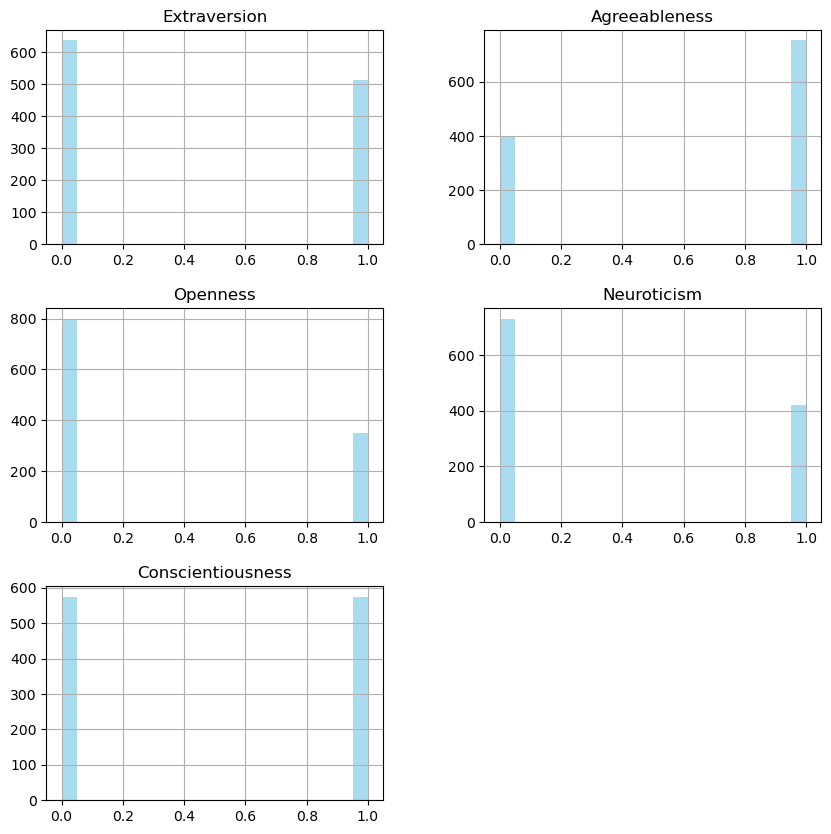

In [195]:

def cleanTraitDf(dff, trait):
	trait1 = dff[dff[trait] == 1]
	trait0 = dff[dff[trait] == 0]
	if len(trait1) > len(trait0):
		trait1 = trait1.sample(len(trait0))
	else:
		trait0 = trait0.sample(len(trait1))

	trait = pd.concat([trait1, trait0])

	return trait

new_df = cleanTraitDf(df, traits[0])

for trait in traits[1:]:
	new_df = cleanTraitDf(new_df, traits[i])

new_df[traits].hist(bins=20, figsize=(10, 10), color='skyblue', alpha=0.7)

### - Preprocessing the text using tf-idf stacked with semantics embedding of fasttext

In [202]:


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from scipy.sparse import hstack, csr_matrix


text = df['clean_text'].to_list()

# tf-idf

# Create a TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000)
# Fit the vectorizer and transform the data
X = tfidf.fit_transform(text).toarray()

# use fasttext
def embedding_func(text, model):
	embeddings = [model[word] for word in text if word in model]
	if embeddings:
		return np.mean(embeddings, axis=0)
	else:
		return np.zeros(300)
	
X_fast = np.array([embedding_func(sentence, fast_model) for sentence in tokens])


X_fast_sparse = csr_matrix(X_fast)

X = hstack([X, X_fast_sparse])


#### - Fit a number of models to the data and compare their performance wrt to the different traits

In [206]:
#X = paddded_tokens
models = [LogisticRegression(), RandomForestClassifier(), XGBClassifier(), SVC(), DecisionTreeClassifier()]
trained_model = []

for i in range(5):
	Y = df[traits[i]].to_numpy()
	X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
	highestAccuracy = -1
	print(f'Training for {traits[i]}')
	for j, m in enumerate(models):
		m.fit(X_train, Y_train)
		Y_pred = m.predict(X_test)
		accuracy = accuracy_score(Y_test, Y_pred)
		if accuracy > highestAccuracy:
			highestAccuracy = accuracy
			trained_model.append(m)
		print(f'	- training with {str(m).split("(")[0]} accuracy: {accuracy}')
	
	# print the best model
	Y_pred = trained_model[-1].predict(X_test)
	print(f'{str(trained_model[-1]).split("(")[0]}')
	Y_pred = [1 if x > 0.5 else 0 for x in Y_pred]
	print(confusion_matrix(Y_test, Y_pred))
	print(classification_report(Y_test, Y_pred))
	print(accuracy_score(Y_test, Y_pred))
	print('*'*50)

Training for Extraversion
	- training with LogisticRegression accuracy: 0.6645885286783042
	- training with RandomForestClassifier accuracy: 0.6608478802992519
	- training with XGBClassifier accuracy: 0.5922693266832918
	- training with SVC accuracy: 0.6645885286783042
	- training with DecisionTreeClassifier accuracy: 0.5698254364089775
LogisticRegression
[[515  19]
 [250  18]]
              precision    recall  f1-score   support

         0.0       0.67      0.96      0.79       534
         1.0       0.49      0.07      0.12       268

    accuracy                           0.66       802
   macro avg       0.58      0.52      0.46       802
weighted avg       0.61      0.66      0.57       802

0.6645885286783042
**************************************************
Training for Agreeableness
	- training with LogisticRegression accuracy: 0.6246882793017456
	- training with RandomForestClassifier accuracy: 0.628428927680798
	- training with XGBClassifier accuracy: 0.5985037406483791
	-